#  Классификация изображений с помощью сверточных нейронных сетей

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.html#convolution-layers
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://kozodoi.me/blog/20210308/compute-image-stats
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html

## Задачи для совместного разбора

1\. Рассмотрите основные возможности по созданию датасетов из `torchvision` и примеры работы основных слоев для создания сверточных нейронных сетей для анализа изображений.

In [ ]:
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import torchvision.transforms.v2 as T

In [ ]:
transform = T.Compose(
    [T.ToTensor(),
    T.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))] # https://kozodoi.me/blog/20210308/compute-image-stats
)

dataset = CIFAR10(
    root = './tmp',
    train = True,
    download = True,
    transform = transform
)

Files already downloaded and verified


In [ ]:
x = dataset[0][0]
x

tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -0

2\. Реализуйте типовую архитектуру CNN для классификации изображений.

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
x.shape # channels x h x w

torch.Size([3, 32, 32])

In [ ]:
conv = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3)

In [ ]:
b = x.unsqueeze(0)
b.shape # batch x channels x h x w

torch.Size([1, 3, 32, 32])

In [ ]:
o = conv(b)
o.shape

torch.Size([1, 5, 30, 30])

In [ ]:
pool = nn.MaxPool2d(kernel_size=2) # kernel_size: обычно четное и не очень большое

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3)
    self.pool1 = nn.MaxPool2d(kernel_size=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3)
    self.pool2 = nn.MaxPool2d(kernel_size=2)

    self.fc = nn.Linear(in_features=12*6*6, out_features=10)

  def forward(self, X):
    # feature extractors
    out = self.conv1(X)
    out = out.relu()
    out = self.pool1(out)
    out = self.conv2(out)
    out = out.relu()
    out = self.pool2(out) # b x 12 x 6 x 6

    # classifier
    out = th.flatten(out, start_dim=1) # b x 12*6*6
    out = self.fc(out)
    return out

In [ ]:
net = ConvNet()
o = net(b)
o.shape

torch.Size([1, 10])

## Задачи для самостоятельного решения

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<p class="task" id="1"></p>

1\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Используя преобразования `torchvision`, приведите картинки к размеру 300х300 и нормализуйте значения интенсивности пикселей (рассчитайте статистику для нормализации отдельно). Выведите на экран количество картинок в датасете,  размер одной картинки, количество уникальных классов. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

- [ ] Проверено на семинаре

In [1]:
from torchvision.datasets import ImageFolder, DatasetFolder
from torchvision.transforms import v2
import torch as th
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
# import cv2
# import pandas as pd
# from sklearn.model_selection import train_test_split

In [4]:
h, w = 300, 300
transform = v2.Compose([
    v2.Resize((h, w)),
    v2.ToTensor()
])

dataset = ImageFolder(root='/content/drive/MyDrive/Учеба/DL/04/cat_breeds_4', transform=transform)

loader = DataLoader(dataset, batch_size=200, num_workers=2)
psum = 0
psum_sq = 0
for i in loader:
  print(1)
  psum += i[0].sum(dim=(0, 2, 3))
  psum_sq += (i[0] ** 2).sum(dim=(0, 2, 3))


cnt = len(dataset) * h * w
mean = psum / cnt
var  = (psum_sq / cnt) - (mean ** 2)
std  = th.sqrt(var)

print(f'mean: {mean}')
print(f'std: {std}')

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
mean: tensor([0.5000, 0.4514, 0.4066])
std: tensor([0.2644, 0.2585, 0.2573])


In [5]:
transform = v2.Compose([
    v2.Resize((h, w)),
    v2.ToTensor(),
    v2.Normalize(mean, std)
])

CatBreeds = ImageFolder(root='/content/drive/MyDrive/Учеба/DL/04/cat_breeds_4', transform=transform)
print(f'Количество картинок в датасете: {len(CatBreeds)}')
print(f'Размер одной картинки: {CatBreeds[0][0].shape}')
print(f'Количество уникальных классов: {len(CatBreeds.classes)}')
# print(f'mean: {mean}')
# print(f'std: {std}')

Количество картинок в датасете: 4000
Размер одной картинки: torch.Size([3, 300, 300])
Количество уникальных классов: 4


In [6]:
n = len(CatBreeds)
train_size = int(0.8*n)
test_size = n - train_size
train_dataset, test_dataset = random_split(CatBreeds, [train_size, test_size])

# DataLoader для обучающего и тестового множества
batch_size = 400
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
len(train_dataset) / n, len(test_dataset) / n

(0.8, 0.2)

<p class="task" id="2"></p>

2\. Решите задачу классификации на основе датасета из предыдущего задания, не используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели.   

- [ ] Проверено на семинаре

In [8]:
import torch.nn as nn
import torch as th
import matplotlib.pyplot as plt

In [9]:
class NoConvNet(nn.Module):
  def __init__(self):
    super(NoConvNet, self).__init__()
    self.fc1 = nn.Linear(3*300*300, 25)
    self.fc2 = nn.Linear(25, 4)

  def forward(self,x):
    out = self.fc1(th.flatten(x, start_dim=1))
    out = th.sigmoid(out)
    out = self.fc2(out)
    return out

In [10]:
model_t2 = NoConvNet()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = th.optim.Adam(model_t2.parameters(), lr=learning_rate)

n_epochs = 50
loss_train_list = []
acc_train_list = []
acc_test_list = []

for epoch in range(n_epochs):
  cur_loss = 0
  cur_acc_train = 0
  for x, y in train_loader:
    optimizer.zero_grad()
    z = model_t2(x)
    loss=criterion(z, y)
    loss.backward()
    optimizer.step()
    cur_loss += loss.data.item()
    cur_acc_train += th.sum(z.argmax(dim=1) == y) # TP + TN

  cur_acc_test = 0
  for x, y in test_loader:
    zt = model_t2(x)
    cur_acc_test += th.sum(zt.argmax(dim=1) == y) # TP + TN

  loss_train_list.append(cur_loss)
  acc_train_list.append((cur_acc_train/train_size).item())
  acc_test_list.append((cur_acc_test/test_size).item())
  #print(cur_loss)

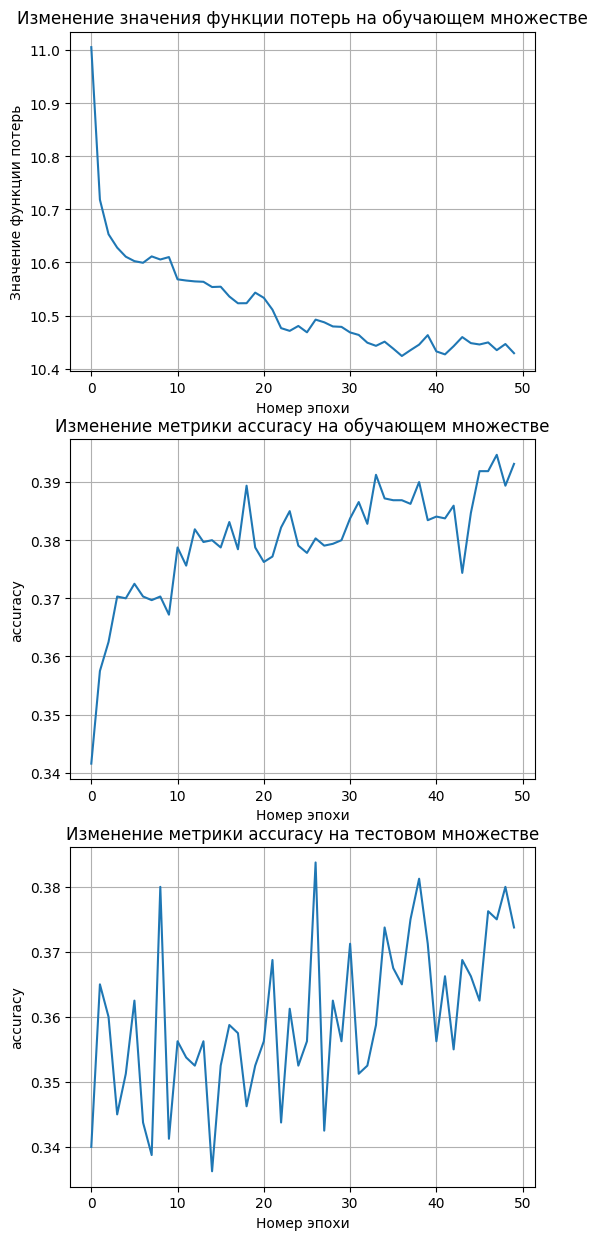

In [11]:
fig = plt.figure(figsize=(6,15))

fig.add_subplot(311)
plt.plot(loss_train_list)
plt.title('Изменение значения функции потерь на обучающем множестве')
plt.xlabel('Номер эпохи')
plt.ylabel('Значение функции потерь')
plt.grid()

fig.add_subplot(312)
plt.plot(acc_train_list)
plt.title('Изменение метрики accuracy на обучающем множестве')
plt.xlabel('Номер эпохи')
plt.ylabel('accuracy')
plt.grid()

fig.add_subplot(313)
plt.plot(acc_test_list)
plt.title('Изменение метрики accuracy на тестовом множестве')
plt.xlabel('Номер эпохи')
plt.ylabel('accuracy')
plt.grid()

In [12]:
print('Итоговые значения метрики accuracy')
print(f' * на обучающем множестве: {round(acc_train_list[-1],3)}')
print(f' * на тестовом множестве: {round(acc_test_list[-1],3)}')
print(f' * количество параметров модели: {sum(p.numel() for p in model_t2.parameters())}')

Итоговые значения метрики accuracy
 * на обучающем множестве: 0.393
 * на тестовом множестве: 0.374
 * количество параметров модели: 6750129


<p class="task" id="3"></p>

3\. Напишите функцию, которая выбирает несколько изображений из переданного набора данных и выводит их на экран в виде сетки с указанием над ними названия правильного класса и класса, предсказанного моделью. Воспользовавшись данной функцией, выведите прогнозы итоговой модели из предыдущей задачи по 6 случайным картинкам.

```
def show_examples(model, dataset, k=6):
    pass
```

- [ ] Проверено на семинаре

In [13]:
def show_examples(model, dataset, k=6, nx=3, ny=2, mean=mean, std=std):
  fig = plt.figure(figsize=(ny*4,nx*2))

  idxs = th.randint(0,len(dataset), size=(k,))
  for i in range(k):
    X, y = CatBreeds[idxs[i]]
    y_pred = model(X.unsqueeze(dim=0)).argmax().item()
    fig.add_subplot(ny, nx, i+1)
    plt.imshow(X.permute(1,2,0)*std+mean)
    plt.title(f'y_true={y}, y_pred = {y_pred}')

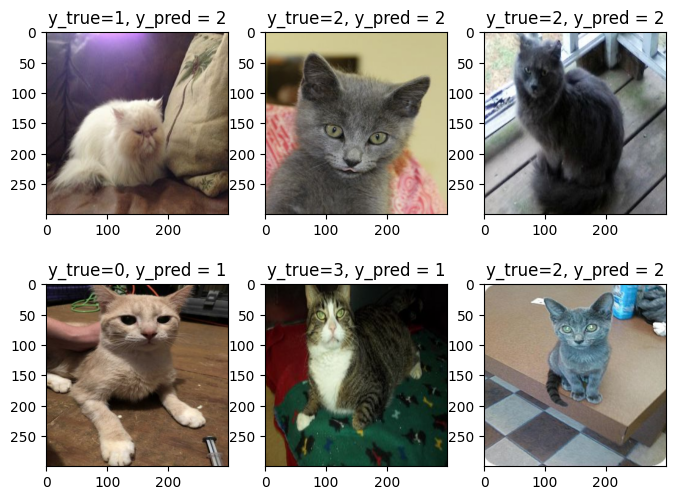

In [15]:
show_examples(model_t2, CatBreeds)

<p class="task" id="4"></p>

4\. Решите задачу классификации на основе датасета из первого задания, используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели. Воспользовавшись функцией из предыдущего задания, выведите прогнозы итоговой модели по 6 случайным картинкам.

- [ ] Проверено на семинаре

In [17]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=5)
    self.pool1 = nn.MaxPool2d(kernel_size=2)
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
    self.pool2 = nn.MaxPool2d(kernel_size=2)

    self.fc = nn.Linear(in_features=6*72*72, out_features=4)

  def forward(self, X):
    # feature extractors
    out = self.conv1(X)
    out = out.relu()
    out = self.pool1(out)
    out = self.conv2(out)
    out = out.relu()
    out = self.pool2(out) # b x 6 x 72 x 72

    # classifier
    out = th.flatten(out, start_dim=1) # b x 6*72*72
    out = self.fc(out)
    return out

In [19]:
model_t4 = ConvNet()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = th.optim.Adam(model_t2.parameters(), lr=learning_rate)

n_epochs = 10
loss_train_list = []
acc_train_list = []
acc_test_list = []

for epoch in range(n_epochs):
  cur_loss = 0
  cur_acc_train = 0
  for x, y in train_loader:
    optimizer.zero_grad()
    z = model_t2(x)
    loss=criterion(z, y)
    loss.backward()
    optimizer.step()
    cur_loss += loss.data.item()
    cur_acc_train += th.sum(z.argmax(dim=1) == y) # TP + TN

  cur_acc_test = 0
  for x, y in test_loader:
    zt = model_t2(x)
    cur_acc_test += th.sum(zt.argmax(dim=1) == y) # TP + TN

  loss_train_list.append(cur_loss)
  acc_train_list.append((cur_acc_train/train_size).item())
  acc_test_list.append((cur_acc_test/test_size).item())

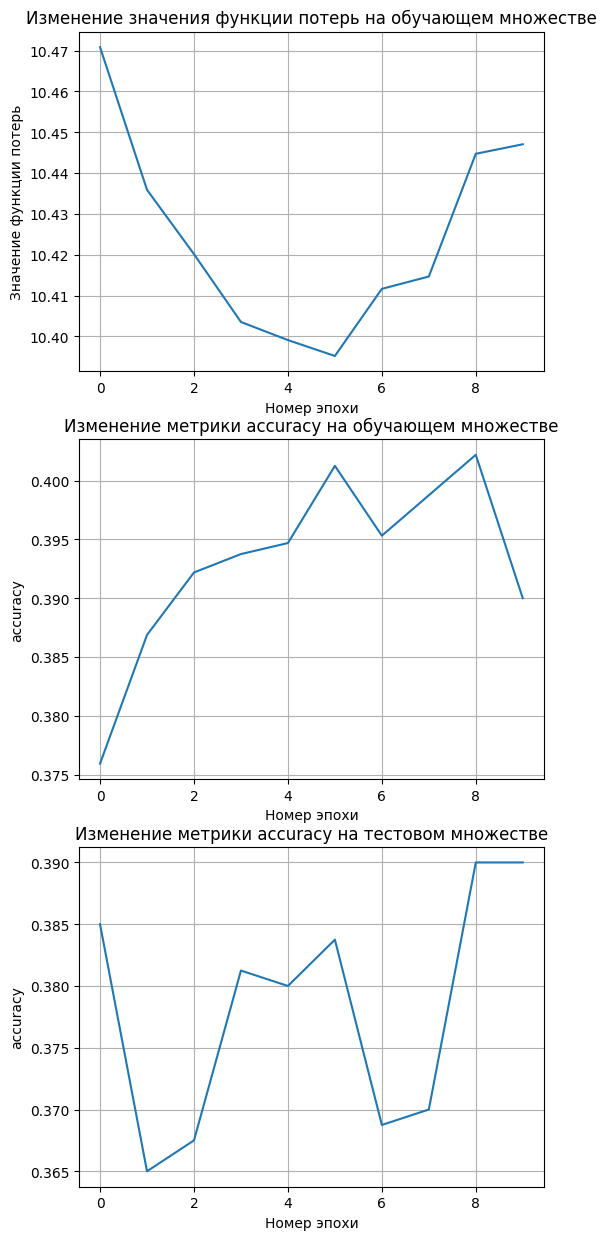

In [20]:
fig = plt.figure(figsize=(6,15))

fig.add_subplot(311)
plt.plot(loss_train_list)
plt.title('Изменение значения функции потерь на обучающем множестве')
plt.xlabel('Номер эпохи')
plt.ylabel('Значение функции потерь')
plt.grid()

fig.add_subplot(312)
plt.plot(acc_train_list)
plt.title('Изменение метрики accuracy на обучающем множестве')
plt.xlabel('Номер эпохи')
plt.ylabel('accuracy')
plt.grid()

fig.add_subplot(313)
plt.plot(acc_test_list)
plt.title('Изменение метрики accuracy на тестовом множестве')
plt.xlabel('Номер эпохи')
plt.ylabel('accuracy')
plt.grid()

In [23]:
print('Итоговые значения метрики accuracy')
print(f' * на обучающем множестве: {round(acc_train_list[-1],3)}')
print(f' * на тестовом множестве: {round(acc_test_list[-1],3)}')
print(f' * количество параметров модели: {sum(p.numel() for p in model_t4.parameters())}')

Итоговые значения метрики accuracy
 * на обучающем множестве: 0.39
 * на тестовом множестве: 0.39
 * количество параметров модели: 125104


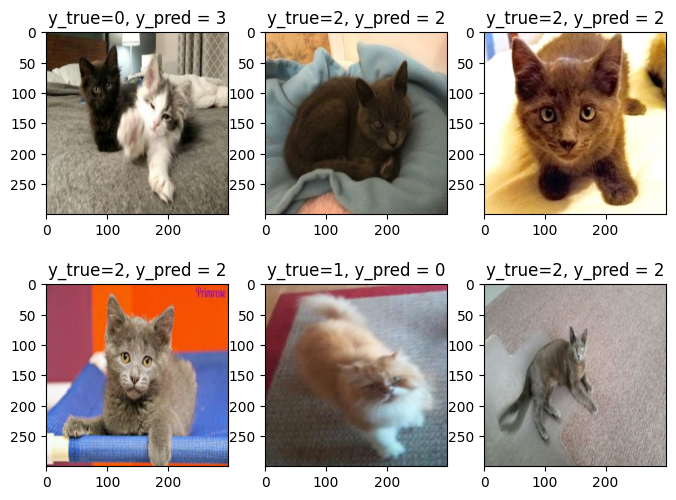

In [26]:
show_examples(model_t4, CatBreeds)

<p class="task" id="5"></p>

5\. Проанализируйте обученную в предыдущей задаче модель, исследовав обученные ядра сверточных слоев. Выберите одно изображение из тестового набора данных и пропустите через первый сверточный слой модели. Визуализируйте полученные карты признаков.

- [ ] Проверено на семинаре

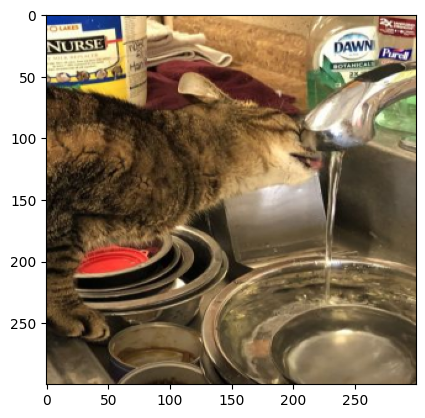

In [27]:
img5 = test_dataset[0][0]
plt.imshow(img5.permute(1,2,0)*std+mean);

In [28]:
first_conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=5)
img5_after_conv = first_conv(img5)
img5_after_conv.shape

torch.Size([3, 296, 296])

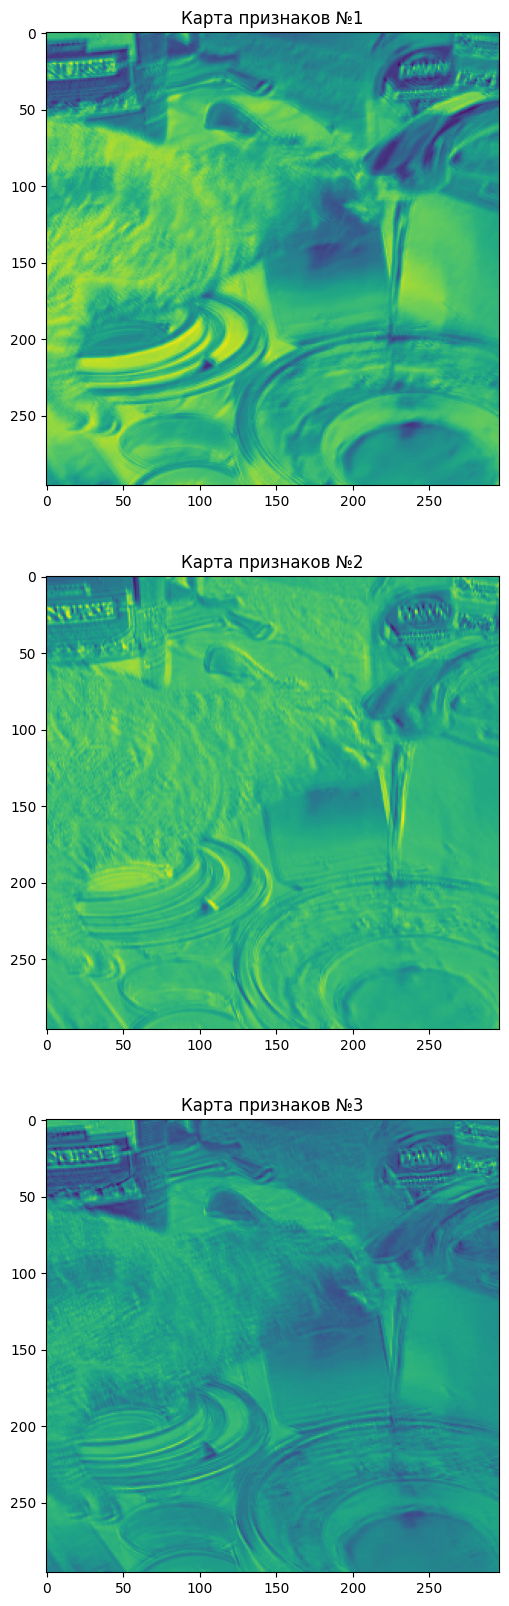

In [29]:
fig = plt.figure(figsize=(20,20))
r, c = img5_after_conv.shape[0], 1

for i, img in enumerate(img5_after_conv):
  fig.add_subplot(r, c, i+1)
  plt.imshow(img.detach().numpy())
  plt.title(f'Карта признаков №{i+1}')

## Обратная связь
- [x] Хочу получить обратную связь по решению